# Using Convolutional Neural Networks

Welcome to the first week of the first deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to this week's task: 'Dogs vs Cats'

We're going to try to create a model to enter the [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats) competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): *"**State of the art**: The current literature suggests machine classifiers can score above 80% accuracy on this task"*. So if we can beat 80%, then we will be at the cutting edge as of 2013!

## Create validation and test data

In [92]:
% pwd

u'/home/ubuntu/courses/deeplearning1/nbs'

In [93]:
import os, sys

HOME_DIR = '/Users/vinod/programming/DL/'
HOME_DIR = '/home/ubuntu/' # AWS
LESSON_DIR = os.getcwd()
DATA_DIR = HOME_DIR + 'data/catsanddogs/redux/'
DATA_DIR = HOME_DIR + 'data/redux/' # AWS

# Using sample data set?
isSample = False

In [128]:
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import datetime
from glob import glob
from shutil import copyfile
import utils; reload(utils)
from utils import *

from vgg16 import Vgg16



%matplotlib inline

ImportError: No module named utils

# DO the following only first time... 

In [9]:
# create required directory structure
% cd $DATA_DIR

# delete if it exists
% rm -rf sample/


# create
% mkdir valid
% mkdir results
% mkdir -p test/unknown

% mkdir -p sample/valid
% mkdir -p sample/train
% mkdir -p sample/test
% mkdir -p sample/test/unknown
% mkdir -p sample/results

/home/ubuntu/data/redux


In [10]:
# Create valid data set
% cd $DATA_DIR/train

image_files = glob('*.jpg')
random_files = np.random.permutation(image_files)
for i in range(2000): os.rename(random_files[i], DATA_DIR+'/valid/'+random_files[i])

% ls $DATA_DIR/valid | wc -l
% ls $DATA_DIR/valid | head
% ls $DATA_DIR/valid | tail

/home/ubuntu/data/redux/train
23000
cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
ls: write error
dog.9989.jpg
dog.9990.jpg
dog.9991.jpg
dog.9992.jpg
dog.9993.jpg
dog.9995.jpg
dog.9996.jpg
dog.9997.jpg
dog.9998.jpg
dog.9999.jpg


In [11]:
# create sample training data set

image_files = glob('*.jpg')
random_files = np.random.permutation(image_files)
for i in range(200): copyfile(random_files[i], DATA_DIR+'sample/train/'+random_files[i])
% ls $DATA_DIR/sample/train/ | wc -l

200


In [12]:
# create sample valid data set
%cd $DATA_DIR/valid

image_files = glob('*.jpg')
random_files = np.random.permutation(image_files)
for i in range(50): copyfile(random_files[i], DATA_DIR+'sample/valid/'+random_files[i])
% ls $DATA_DIR/sample/valid/ | wc -l

/home/ubuntu/data/redux/valid
50


In [13]:
# Move the image files to the correct directories
% cd $DATA_DIR/train
% mkdir cats
% mkdir dogs
% mv cat.* cats/
% mv dog.* dogs/
% ls cats/ | wc -l
% ls dogs/ | wc -l

% cd $DATA_DIR/valid
% mkdir cats
% mkdir dogs
% mv cat.* cats/
% mv dog.* dogs/
% ls cats/ | wc -l
% ls dogs/ | wc -l

% cd $DATA_DIR/sample/train
% mkdir cats
% mkdir dogs
% mv cat.* cats/
% mv dog.* dogs/
% ls cats/ | wc -l
% ls dogs/ | wc -l

% cd $DATA_DIR/sample/valid
% mkdir cats
% mkdir dogs
% mv cat.* cats/
% mv dog.* dogs/
% ls cats/ | wc -l
% ls dogs/ | wc -l

/home/ubuntu/data/redux/train
11500
11500
/home/ubuntu/data/redux/valid
1000
1000
/home/ubuntu/data/redux/sample/train
103
97
/home/ubuntu/data/redux/sample/valid
23
27


In [14]:
# As keras requires a "class" directory, lets move all test images to the directory called unknown in test directory
% cd $DATA_DIR/test
% mv *.jpg unknown/
% ls unknown/ | wc -l

# let's also create some test data for the sample set
% cd $DATA_DIR/test/unknown

test_image_files = glob('*.jpg')
random_test_files = np.random.permutation(test_image_files)
for i in range(100): copyfile(random_test_files[i], DATA_DIR+'sample/test/unknown/'+random_test_files[i])
% ls $DATA_DIR/sample/test/unknown | wc -l

/home/ubuntu/data/redux/test
12500
/home/ubuntu/data/redux/test/unknown
100


# UNTIL here ... first time only

## Training the model ...

### Setup paths and constants

In [131]:
print("Process start time : " + str(datetime.datetime.now()))

% cd $DATA_DIR

path = DATA_DIR
if isSample:
    path = DATA_DIR + 'sample/' 
print("Data path for training : " + path)
train_path = path + 'train/'
valid_path = path + 'valid/'
test_path = path + 'test/'
results_path = path + 'results/'

Process start time : 2018-01-09 16:52:10.421638
/home/ubuntu/data/redux
Data path for training : /home/ubuntu/data/redux/


In [96]:
vgg = Vgg16()

In [97]:
batch_size=64
no_of_epochs=1 # experiment with this to improve the model

### Fine tune the model

In [98]:
training_batches = vgg.get_batches(train_path, batch_size=batch_size)
valid_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(training_batches)

vgg.model.optimizer.lr = 0.01 # Experiment with this to improve the model. Do we need to change this between epoch's?

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Fit model using numer of epochs

In [99]:
weights_filename = None

for epoch in range(no_of_epochs):
    print('Executing epoch : %d' % epoch)
    vgg.fit(training_batches, valid_batches, nb_epoch=1) # Note the valid batch is being used by the fit method
    weights_filename = 'model_weights_%d.h5' % epoch
    vgg.model.save_weights(results_path + weights_filename)
    
print('Completed %d fit operations.' % no_of_epochs)
    

Executing epoch : 0
Epoch 1/1
23000/23000 [==============================] - 621s - loss: 0.3540 - acc: 0.9701 - val_loss: 0.2527 - val_acc: 0.9800
Completed 1 fit operations.


## Generate predications

In [100]:
batches, predications = vgg.test(test_path, batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


[[  1.0000e+00   0.0000e+00]
 [  1.0000e+00   3.0462e-16]
 [  1.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00]
 [  0.0000e+00   1.0000e+00]]
['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']
('Showing image : /home/ubuntu/data/redux/test/unknown/9688.jpg, predication : %d, %d :', array([ 1.,  0.], dtype=float32))


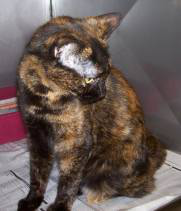

In [101]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
print(predications[:5])

test_filenames = batches.filenames
print(test_filenames[:5])

# Display at least one image
show_file = test_path+test_filenames[2]
from PIL import Image
print("Showing image : " + show_file + ", predication : %d, %d :", predications[2])
Image.open(show_file)

In [102]:
# Save predications
utils.save_array(results_path+'test_predications.dat', predications)
utils.save_array(results_path+'test_filnames.dat', test_filenames)

## Verification

Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most **important metrics** for us to **look at are for the validation set, since we want to check for over-fitting.** 

- **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics,1 it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:

In [115]:
# Load the saved weights
vgg.model.load_weights(results_path+weights_filename)

In [116]:
valid_batches, probabilities = vgg.test(valid_path, batch_size=batch_size*2)

Found 2000 images belonging to 2 classes.


In [120]:
valid_files = valid_batches.filenames
expected_labels = valid_batches.classes # boolean

# Round the probabilities to boolean as they lie between 0 to 1
system_preds = probabilities[:,0] # unlike Kaggle requirement, we use the cats indicator
system_labels = np.round(1 - system_preds) # This will either will give us a 0 for a low value or 1 for > .5



In [121]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + valid_files[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 1960 correct labels


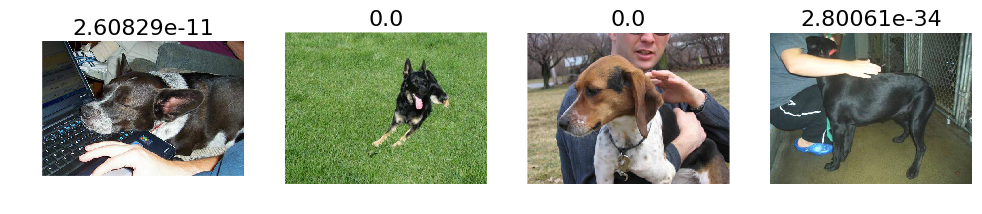

In [122]:
#1. A few correct labels at random
correct = np.where(expected_labels == system_labels)[0]
print("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, system_preds[idx])

## Submit to kaggle

In [108]:
predications = utils.load_array(results_path+'test_predications.dat')
test_filenames = utils.load_array(results_path+'test_filnames.dat')

In [109]:
# Kaggle expects a dog predication indicator
isDog = predications[:,1]
print("Raw predication : " + str(isDog[:5]))
print("Mid Predictions : " + str(isDog[(isDog < .6) & (isDog > .4)]))
print("Edge Predictions: " + str(isDog[(isDog == 1) | (isDog == 0)]))

Raw predication : [  0.0000e+00   3.0462e-16   0.0000e+00   0.0000e+00   1.0000e+00]
Mid Predictions : [ 0.5214  0.5653  0.5453  0.4089]
Edge Predictions: [ 0.  0.  0. ...,  0.  0.  1.]


Log Loss doesn't support probability values of 0 or 1--they are undefined (and we have many). Fortunately, Kaggle helps us by offsetting our 0s and 1s by a very small value. So if we upload our submission now we will have lots of .99999999 and .000000001 values. This seems good, right?

Not so. There is an additional twist due to how log loss is calculated--log **loss rewards predictions that are confident and correct (p=.9999,label=1), but it punishes predictions that are confident and wrong far more (p=.0001,label=1).**

In [110]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isDog = isDog.clip(min=.05, max=.95)

In [111]:
#Extract imageIds from the filenames in our test/unknown directory 
fileIds = np.array([int(f[8:f.find('.')]) for f in test_filenames])

In [112]:
submission = np.stack([fileIds,isDog], axis=1)
submission[:5]

array([[  9.2920e+03,   5.0000e-02],
       [  1.2026e+04,   5.0000e-02],
       [  9.6880e+03,   5.0000e-02],
       [  4.3920e+03,   5.0000e-02],
       [  7.7900e+02,   9.5000e-01]])

In [113]:
%cd $DATA_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, submission, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/data/redux


In [114]:
from IPython.display import FileLink
%cd $DATA_DIR
%cp $submission_file_name $LESSON_DIR/$submission_file_name
%cd $LESSON_DIR
FileLink(submission_file_name)

print("Process end time : " + str(datetime.datetime.now()))

/home/ubuntu/data/redux
/home/ubuntu/courses/deeplearning1/nbs


/home/ubuntu/courses/deeplearning1/nbs/submission1.csv